# Recursive Green Function code - basic usage

In [1]:
from multiprocessing import Pool
import RGF_src as rgf
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/simao/codes/tight-binding-test/src')
import band_structure as bs

# Example 1: 1D TB
The 1D tight-binding lattice can be obtained by using the 2D lattice of width 1 without periodic boundary conditions

In [2]:
# sample geometry
width=1
length=6

# Boundary conditions. Twist false means open boundary conditions. 
# k is only used when twist=True but it needs to exist
twist = False
k = 0

# set the Hamiltonian. ander is the strength of Anderson disorder
sys = rgf.rgf()
sys.set_2dtb_nanoribbon(width, length, twist, k, ander=0.0)



## Landauer

In [3]:
# list of complex energies
eta = 1e-5
NE = 200
energies = np.linspace(-4,4, NE)
zs = energies + eta*1j

land = sys.get_landauer(zs)

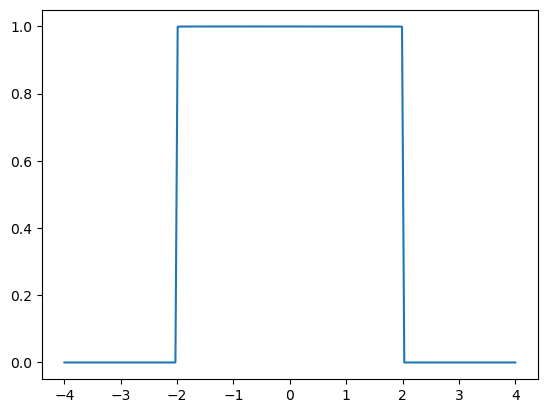

In [4]:
plt.plot(energies, np.real(land))
plt.show()

# Example 2: Graphene Hamiltonian with Rashba

In [5]:
# Hamiltonian paramters
t  = -1.0
λR = 0.3
Δx = 0.4

# Sample geometry
width=3
length=5

# Twist parameters
twist = False
k = 0.0 

# Output parameters
NE = 30
energies = np.linspace(-3.5,3.5, NE)
eta = 1e-5
zs = energies + 1j*eta
    
# Initialize the graphene + Rashba system implemented with the general TB functionality
model = rgf.rgf()
model.set_branislav(width, length, twist, k, t=t, λR=λR, λex=Δx)

# Get Landauer
land = np.real(model.get_landauer(zs))

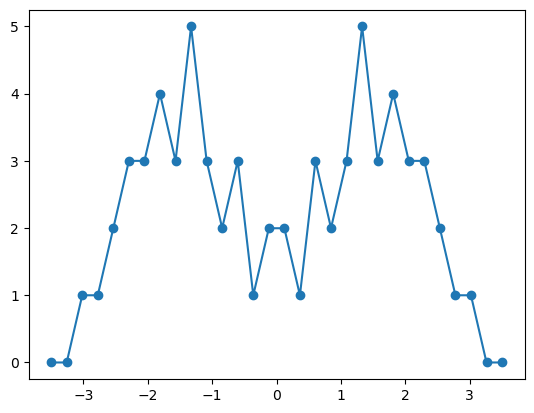

In [6]:
plt.plot(energies, land, '-o')
plt.show()